In [7]:
# Importing necessary libraries
import pandas as pd # deals with data frame        # for Data Manipulation"
import numpy as np  # deals with numerical values  # for Mathematical calculations"
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv("Salary_dataset.csv")

In [11]:
df = df.iloc[:, 1:]
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [13]:
#EDA
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [14]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [15]:
df.sort_values('YearsExperience', ascending = True, inplace = True)

In [16]:
df.reset_index(inplace = True, drop = True)
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [17]:
# Split the data into Target and Predictors
X = pd.DataFrame(df['YearsExperience'])
Y = pd.DataFrame(df['Salary'])

In [18]:

# Select numeric features for data preprocessing
numeric_features = ['YearsExperience']

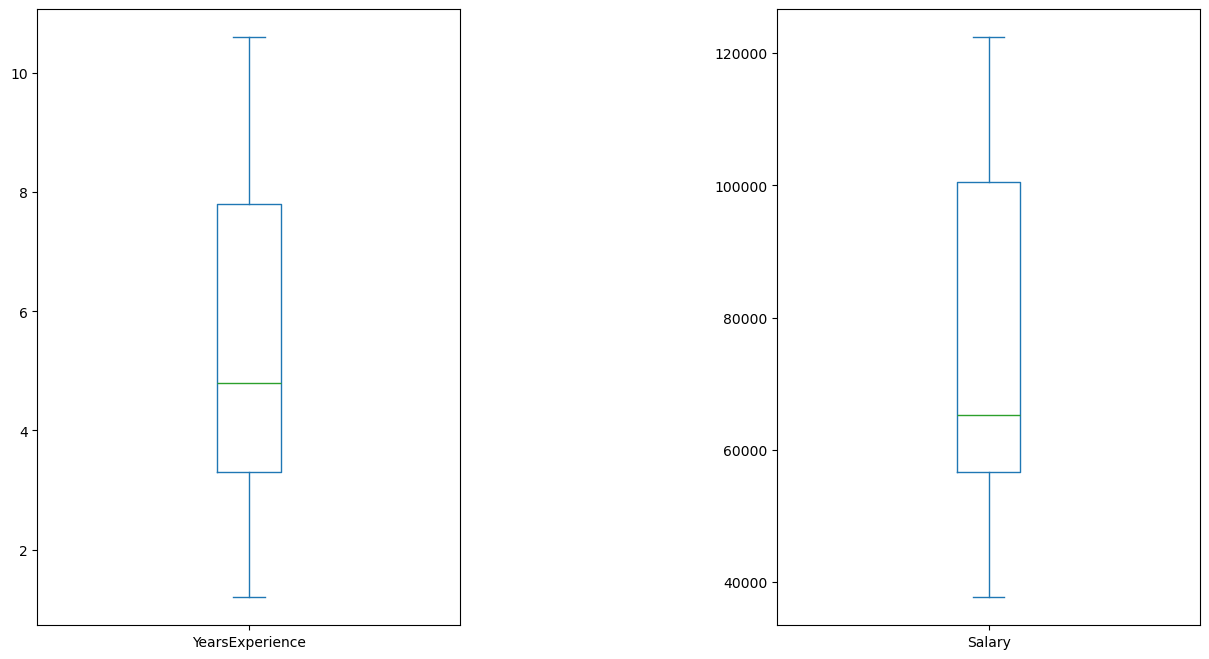

In [19]:
df.plot(kind = 'box', sharey = False, subplots = True, figsize = (15,8))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [20]:
winsor = Winsorizer(capping_method = 'iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['YearsExperience'])

In [21]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])

In [22]:
preprocessor = ColumnTransformer(transformers = [('num',num_pipeline, numeric_features)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['YearsExperience'])])

In [23]:
preprocessor1 = ColumnTransformer(transformers = [('wins',outlier_pipeline, numeric_features)])
preprocessor1

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['YearsExperience']))]),
                                 ['YearsExperience'])])

In [24]:
impute_data = preprocessor.fit(X)
df['YearsExperience'] = pd.DataFrame(impute_data.transform(X))

In [25]:
X2 = pd.DataFrame(df['YearsExperience'])
winz_data = preprocessor1.fit(X2)
df['YearsExperience'] = pd.DataFrame(winz_data.transform(X))

In [26]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [27]:
# Save the data preprocessing pipelines
joblib.dump(impute_data, 'meanimpute')
joblib.dump(winz_data, 'winzor')

['winzor']

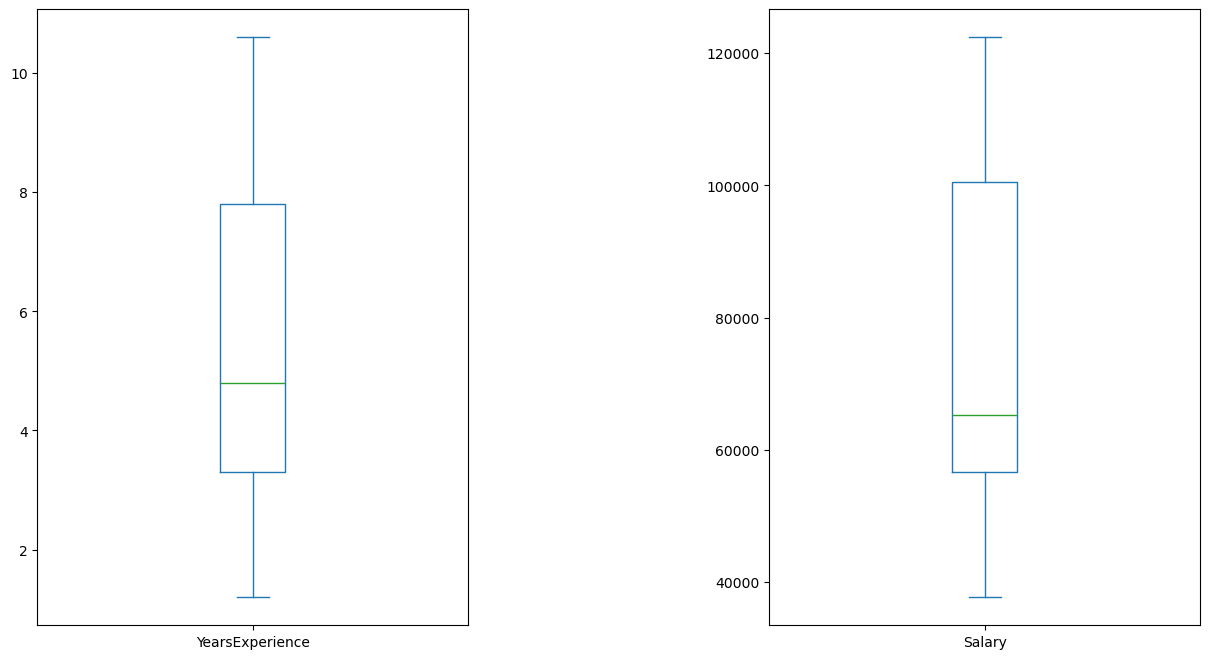

In [28]:
df.plot(kind = 'box', sharey = False, subplots = True, figsize = (15,8))
plt.subplots_adjust(wspace = 0.7)
plt.show()

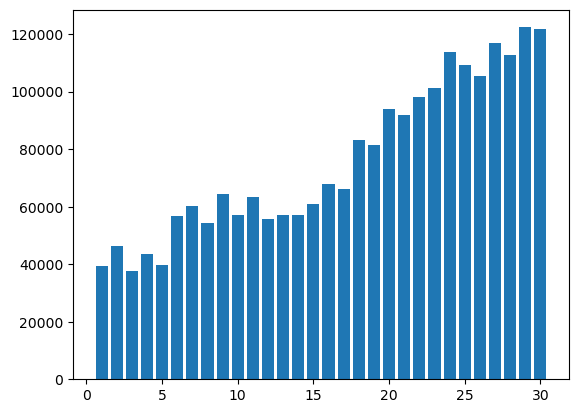

In [29]:
#Graphical Representation
#Barplot
plt.bar(height = df.Salary, x = np.arange(1,31,1))
plt.show()

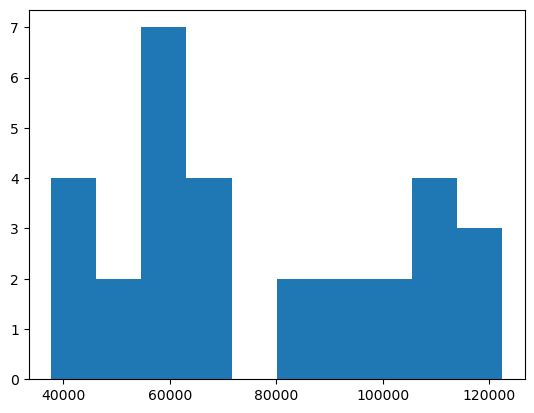

In [30]:
#Histogram
plt.hist(df.Salary)
plt.show()

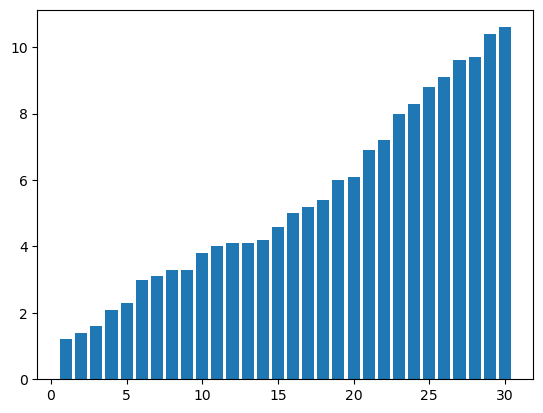

In [31]:
plt.bar(height = df.YearsExperience, x = np.arange(1, 31, 1))
plt.show()

In [32]:
#AutoEDA
import sweetviz as sv
report = sv.analyze(df)
report.show_html('Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


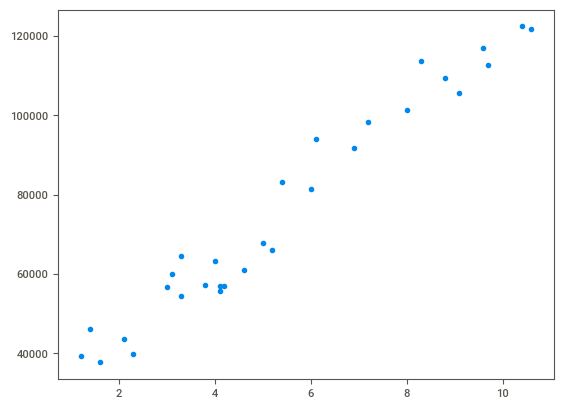

In [33]:
# # Bivariate Analysis
# Scatter plot

plt.scatter(df.YearsExperience, df.Salary)
plt.show()

In [34]:
## Measure the strength of the relationship between two variables using Correlation coefficient.
np.corrcoef(df.YearsExperience, df.Salary)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

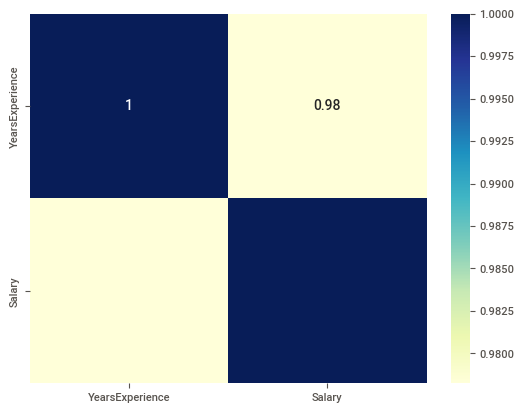

In [35]:
dataplot = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

In [36]:
# # Linear Regression using statsmodels package
# Simple Linear Regression

model = smf.ols('Salary ~ YearsExperience',data = df).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        15:43:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred1 = model.predict(pd.DataFrame(df['YearsExperience']))
pred1

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

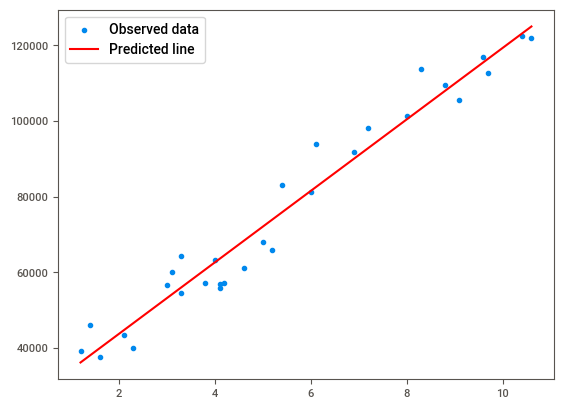

In [39]:
#Regression line
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(df.YearsExperience, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

In [40]:
# Error calculation (error = AV - PV)
res1 = df.Salary - pred1

In [41]:
print(np.mean(res1))

1.4551915228366853e-12


In [42]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.0436087606595

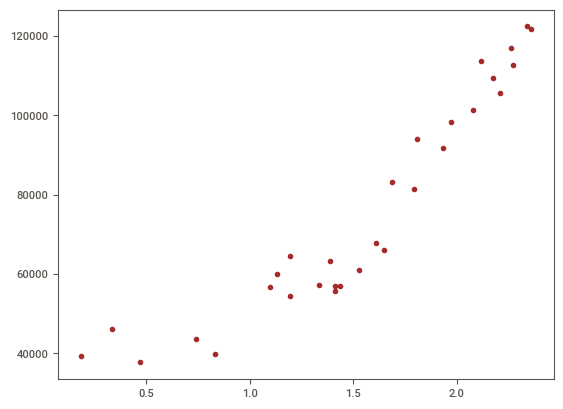

In [43]:
# Model Tuning with Transformations
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(df['YearsExperience']), y = df['Salary'], color = 'brown')

In [44]:
np.corrcoef(np.log(df.YearsExperience), df.Salary)

array([[1.        , 0.92730017],
       [0.92730017, 1.        ]])

In [45]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.80e-13
Time:                        15:43:38   Log-Likelihood:                -319.14
No. Observations:                  30   AIC:                             642.3
Df Residuals:                      28   BIC:                             645.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.173e+04   5260.662      2.230      0.034     956.719    2.25e+04
np.log(YearsExperience)  4.196e+04   3200.975     13.109      0.000    3.54e+04    4.85e+04
==============================================================================
Omnibus:                        1.012   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.865
Skew:                           0.142   Prob(JB):                        0.649
Kurtosis:                       2.218   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred2 = model2.predict(pd.DataFrame(df['YearsExperience']))

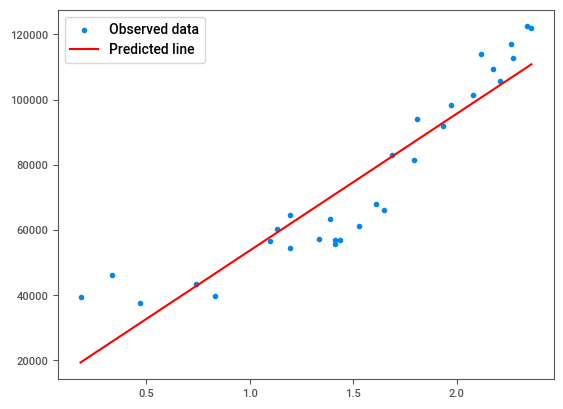

In [47]:
plt.scatter(np.log(df.YearsExperience), df.Salary)
plt.plot(np.log(df.YearsExperience), pred2 , "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

In [48]:
res2 = df.Salary - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10089.251652280955

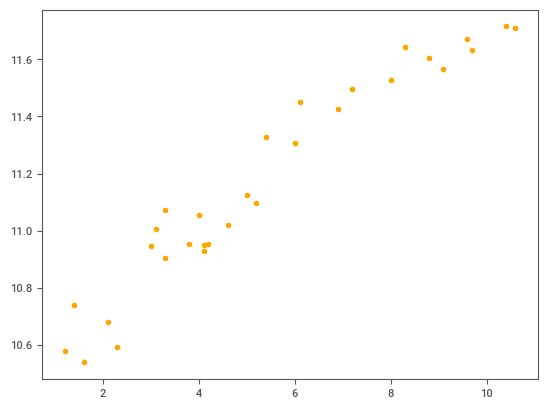

In [49]:
# ## Exponential transformation
# x = waist; y = log(at)
plt.scatter(x = df['YearsExperience'], y = np.log(df['Salary']), color = 'orange')


In [50]:
np.corrcoef(df.YearsExperience, np.log(df.Salary)) #correlation

array([[1.       , 0.9653848],
       [0.9653848, 1.       ]])

In [51]:
model3 = smf.ols('np.log(Salary) ~ YearsExperience', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           7.03e-18
Time:                        15:43:38   Log-Likelihood:                 28.184
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.4949      0.039    269.030      0.000      10.415      10.575
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.827   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pred3 = model3.predict(pd.DataFrame(df['YearsExperience']))

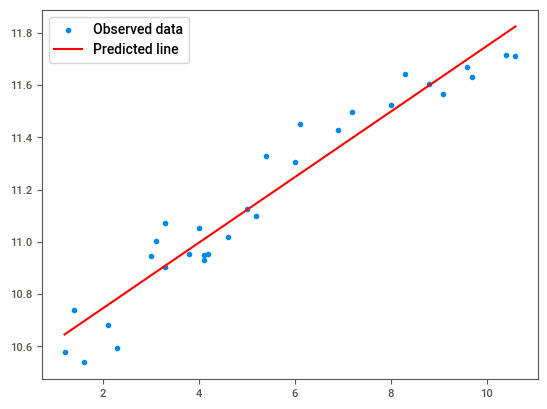

In [53]:
plt.scatter(df.YearsExperience, np.log(df.Salary))
plt.plot(df.YearsExperience, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

In [54]:
pred3_at = np.exp(pred3)
print(pred3_at)

0      41999.905047
1      43067.022950
2      44161.253786
3      47020.013886
4      48214.680840
5      52640.159624
6      53304.695788
7      54659.041593
8      54659.041593
9      58197.371549
10     59676.028633
11     60429.386514
12     60429.386514
13     61192.254883
14     64341.257311
15     67652.309925
16     69371.194552
17     71133.751957
18     76694.698743
19     77662.902511
20     85861.760780
21     89154.774362
22     98566.827419
23    102347.112129
24    108972.509177
25    113151.877846
26    120476.716837
27    121997.630448
28    133195.421573
29    136579.601105
dtype: float64


In [55]:
res3 = df.Salary - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3


7213.187200538682

In [56]:
# ## Polynomial transformation 
# x = waist; x^2 = waist*waist; y = log(at)
X = pd.DataFrame(df['YearsExperience'])
Y = pd.DataFrame(df['Salary'])

In [57]:
model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.95e-18
Time:                        15:43:39   Log-Likelihood:                 32.392
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3166      0.069    148.478      0.000      10.174      10.459
YearsExperience                          0.2037      0.027      7.527      0.000       0.148       0.259
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
pred4 = model4.predict(pd.DataFrame(df))
print(pred4)

0     10.551494
1     10.588795
2     10.625567
3     10.715183
4     10.750103
5     10.868158
6     10.884494
7     10.916769
8     10.916769
9     10.995141
10    11.025565
11    11.040578
12    11.040578
13    11.055459
14    11.113660
15    11.169745
16    11.196994
17    11.223713
18    11.300698
19    11.313066
20    11.407247
21    11.440383
22    11.522925
23    11.551696
24    11.597002
25    11.622598
26    11.662614
27    11.670220
28    11.719760
29    11.732724
dtype: float64


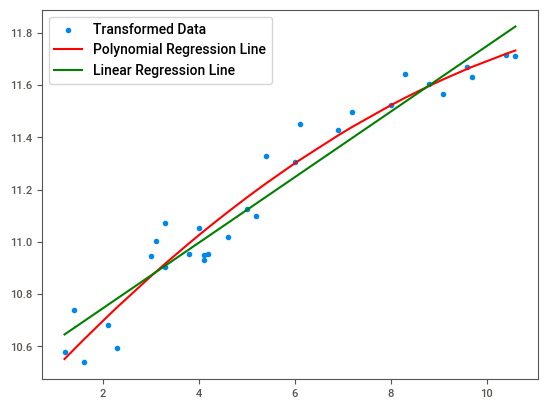

In [59]:
plt.scatter(X['YearsExperience'], np.log(Y['Salary']))
plt.plot(X['YearsExperience'], pred4, color = 'red')
plt.plot(X['YearsExperience'], pred3, color = 'green', label = 'linear')
plt.legend(['Transformed Data', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

In [60]:
pred4_at = np.exp(pred4)
pred4_at


0      38234.531176
1      39687.654187
2      41174.214197
3      45034.442989
4      46634.839536
5      52478.445227
6      53342.767295
7      55092.487085
8      55092.487085
9      59583.940552
10     61424.532495
11     62353.669206
12     62353.669206
13     63288.488962
14     67081.250228
15     70950.994249
16     72910.906524
17     74885.328515
18     80878.080898
19     81884.582252
20     89971.425215
21     93002.627475
22    101004.964296
23    103953.167544
24    108771.191350
25    111591.282088
26    116147.192298
27    117034.007710
28    122977.939142
29    124582.604887
dtype: float64

In [61]:
res4 = df.Salary - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


5391.087452512636

In [62]:
# ### Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10089.251652
2,Exp model,7213.187201
3,Poly model,5391.087453


In [63]:
# # Evaluate the best model
# Data Split
train, test = train_test_split(df, test_size = 0.2, random_state = 0)

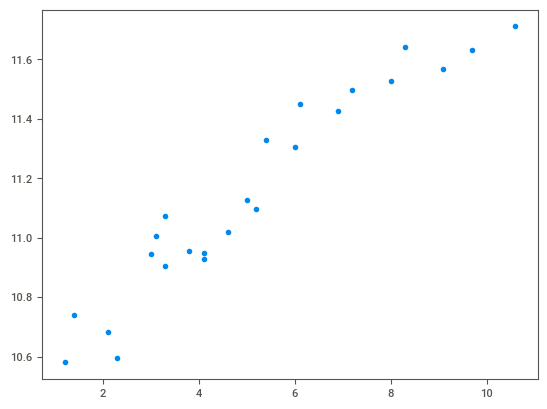

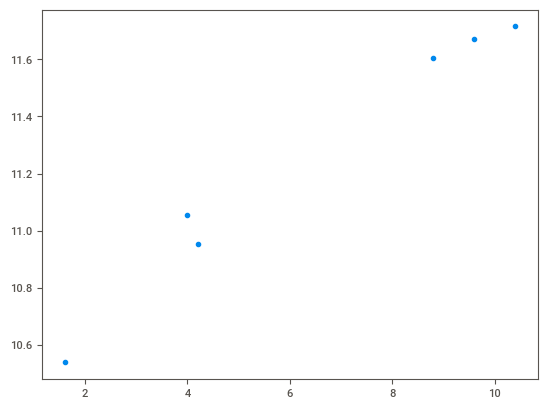

In [64]:
plt.scatter(train.YearsExperience, np.log(train.Salary))
plt.figure(2)
plt.scatter(test.YearsExperience, np.log(test.Salary))
plt.show()

In [65]:
finalmodel = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = df).fit()


In [66]:
# Predict on test data
test_pred = finalmodel.predict(test)
pred_test_Salary = np.exp(test_pred)

In [67]:
# Model Evaluation on Test data
test_res = test.Salary - pred_test_Salary
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)

test_rmse


3028.9289278214537

In [68]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_Salary = np.exp(train_pred)
pred_train_Salary

27    117034.007710
11     62353.669206
17     74885.328515
22    101004.964296
5      52478.445227
16     72910.906524
8      55092.487085
14     67081.250228
23    103953.167544
20     89971.425215
1      39687.654187
29    124582.604887
6      53342.767295
4      46634.839536
18     80878.080898
19     81884.582252
9      59583.940552
7      55092.487085
25    111591.282088
3      45034.442989
0      38234.531176
21     93002.627475
15     70950.994249
12     62353.669206
dtype: float64

In [69]:
# Model Evaluation on train data
train_res = train.Salary - pred_train_Salary
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)

train_rmse


5834.053246958805

In [70]:

##### Save the Best model (Polynomial with 2-degree model) for Pipelining

poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
poly_model.fit(df[['YearsExperience']], df[['Salary']])


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [71]:
pickle.dump(poly_model, open('poly_model.pkl', 'wb'))

In [74]:
### testing on new data
# Load the saved pipelines

impute = joblib.load('meanimpute')
winsor = joblib.load('winzor')
poly_model = pickle.load(open('poly_model.pkl', 'rb'))


In [75]:
df_test = pd.read_csv("Exp.csv")

In [77]:
clean1 = pd.DataFrame(impute.transform(df_test), columns = df_test.select_dtypes(exclude = ['object']).columns)

In [78]:
clean2 = pd.DataFrame(winsor.transform(clean1), columns = clean1.columns)

In [79]:
prediction = pd.DataFrame(poly_model.predict(clean2), columns = ['Pred_AT'])

In [81]:
final = pd.concat([prediction, df_test], axis = 1)

In [82]:
final

,Pred_AT,YearsExperience
0,36420.979959,1.2
1,40141.741784,1.6
2,53205.717436,3.0
3,56013.500998,3.3
4,60699.697296,3.8
5,63515.349291,4.1
6,63515.349291,4.1
7,64454.555659,4.2
8,71980.009247,5.0
9,75750.604472,5.4
